In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from random import randint
from matplotlib import pyplot as plt

In [32]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

In [34]:
data_train.head(6)

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,checking_account_status_A12,checking_account_status_A13,checking_account_status_A14,...,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202,target
0,36,8086.0,2.0,4.0,42.0,4.0,1,1,0,0,...,0,1,1,0,0,0,1,1,0,1
1,15,3812.0,1.0,4.0,23.0,1.0,1,0,0,1,...,0,1,1,0,0,1,0,1,0,0
2,36,2145.0,2.0,1.0,24.0,2.0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,1
3,12,2578.0,3.0,4.0,55.0,1.0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,21,5003.0,1.0,4.0,29.0,2.0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
5,15,2327.0,2.0,3.0,25.0,1.0,1,0,1,0,...,0,1,1,0,1,0,0,0,0,1


 ## MODEL ON DATA TRAIN

In [35]:
def uplo(db):
    y = db['target']
    X = db.drop('target', axis=1)
    xt, xte, yt, yte = train_test_split(X, y, test_size=0.3, random_state=42)
    print('The shape of X dataset', X.shape[0])
    print('The shape of X_train', xt.shape[0])
    
    return xt,xte,yt,yte

In [36]:
X_train, X_test, y_train, y_test = uplo(data_train)

The shape of X dataset 900
The shape of X_train 630


In [37]:
X_train.shape

(630, 48)

## CORRELATION MATRIX

In [38]:
corrMatrix = data_train.corr()
print(corrMatrix['target'][:10].sort_values(ascending=False))

duration                       0.223492
credit_amount                  0.168680
checking_account_status_A12    0.116657
installment_rate               0.065554
present_residence              0.007676
dependents                    -0.002630
existing_credits              -0.055938
checking_account_status_A13   -0.082670
age                           -0.097674
checking_account_status_A14   -0.315427
Name: target, dtype: float64


In [41]:
fp = []
nu = [randint(2, 49) for p in range(2, 7)]
nam = list(X_train.columns[nu])
nam.extend(['duration','age'])
nam

['purpose_A41',
 'checking_account_status_A13',
 'job_A173',
 'job_A172',
 'purpose_A42',
 'duration',
 'age']

In [42]:
def stree(fl,xt,xte,yt,yte):
    for i in xt.loc[:,nam]:
        df = xt.iloc[np.random.permutation(xt[i].values)]
        clf = DecisionTreeClassifier()
        clf = clf.fit(df,yt)
        
        #Predict the response for test dataset
        y_pred = clf.predict(xte)
        cm = confusion_matrix(yte, y_pred)
        print(cm[1,0])
        fl.append(cm[1,0])
   
    clf = clf.fit(xt,yt)
    y_base = clf.predict(xte)
    cm = confusion_matrix(yte, y_base)
    fl.append(cm[1,0])
    return fl

In [43]:
stree(fp,X_train,X_test,y_train,y_test)

71
71
71
71
71
50
65


[71, 71, 71, 71, 71, 50, 65, 35]

In [44]:
re = nam.copy()
re.append('BASE')

Calling DataFrame constructor after zipping

In [78]:
lt = pd.DataFrame(list(zip(re, fp)),columns =['Name', 'CM val'])
lt.index = lt.Name
lt.drop(columns='Name', inplace=True)

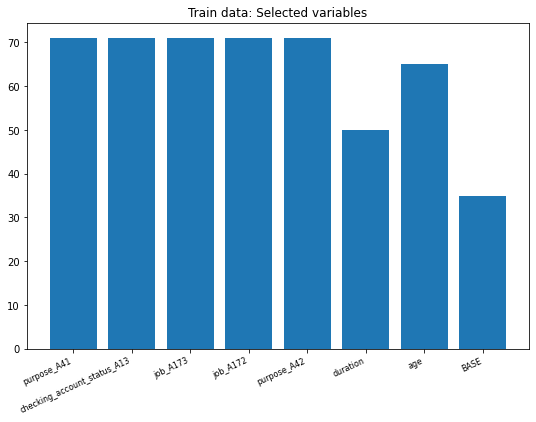

In [47]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.bar(re, fp)
plt.setp(plt.gca().get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=8)
plt.title('Train data: Selected variables')
plt.show()

 ## MODEL ON DATA TEST

In [48]:
X_train, X_test, y_train, y_test = uplo(data_test)

The shape of X dataset 100
The shape of X_train 70


In [49]:
fpt = []

In [50]:
stree(fpt,X_train,X_test,y_train,y_test)

10
10
10
10
10
8
9


[10, 10, 10, 10, 10, 8, 9, 7]

In [51]:
ret = nam.copy()
ret.append('TEST')

Calling DataFrame constructor after zipping<br>
xg = lt['CM val']

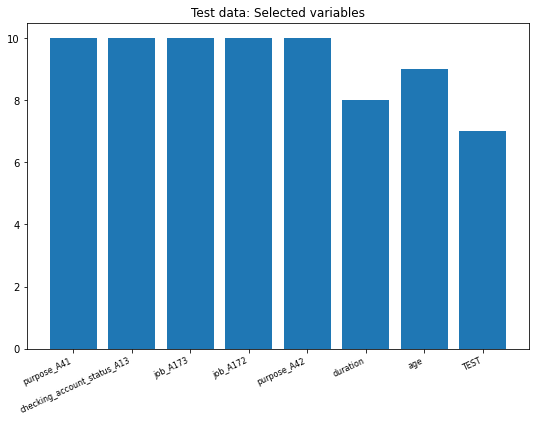

In [52]:
fig, ax = plt.subplots(figsize = (9, 6))
plt.bar(ret, fpt)
plt.setp(plt.gca().get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=8)
plt.title('Test data: Selected variables')
plt.show()

In [145]:
 lt.loc[["duration", "age"]]

,CM val
Name,
duration,50
age,65


In [130]:
lt[lt['CM val'] > 35].min()

CM val    50
dtype: int64

In [168]:
Dict = {'fp': [fp[-1]],
        'most_important' : lt.loc[["duration", "age"]].to_dict(),
        'fp_most_important' : lt[lt['CM val'] > 35].min()}

{'CM val': {'duration': 50, 'age': 65}}